# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

# ***BUSINESS CONTEXT***

The electronic news portals have given an opportunity for people to get instant access to updates of day-to-days events occuring all over the world.They perform this task by  retrieveing these updates electronically from online databases, processing it using a variety of software, and then transmitting it to the users.
One  such news portal,E-news Express, has decided to expand its business by acquiring new subscribers.The executives of this organization are of the opinion that there is a decline in the number of new monthly subscribers in comparison to the previous year & the probable cause might be the current webpage design in terms of outline & content recommendation to customers.

# ***OBJECTIVE***

The design team of the company created a new landing page with a new outline & releavant content in comparison to old page.In order test its effectiveness, an experiment was conducted amongst 100 users where 2 groups of 50 users each were created-Control team who will use the existing landing page & Treatment team who will use the new landing page.Based on the data obtained from the experiment, we will determine the effectiveness by performing the below tasks

Task 1: Determine if the users spend more time on the new landing page or existing landing page

Task 2: Determine if the conversion rate for the new  page greater than that of the old page.

Task 3: Determine if the converted status depend on the preferred language.

Task 4: Is the time spent on the new page same for different language users.

# ***DATA DICTIONARY***

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
import pandas as pd # library for data manipulation & analysis
import numpy as np # library to work with arrays
import seaborn as sns # library for visuvalization
import matplotlib.pyplot as plt# library for plots
import scipy.stats as stats # library for statistical analysis

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Statistics/abtest.csv')

Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#First 5 rows of the dataset
df.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#Last 5 rows of the dataset
df.tail(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#Number of Rows & Columns in the dataset
df.shape

(100, 6)

OBSERVATION:

The dataset contains 100 rows & 6 columns.

In [ ]:
#Information on the datatypes of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


OBSERVATION:
1. There is no null value in the dataset provided.
2. There is 1 Float type column, 1 Integer Type column & 4 Object Type  columns.

In [ ]:
#Statistical Summary
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


OBSERVATION:


1.   On an average the user spends 5.37 minutes on a page while the median is 5.41 minutes.
2.   The minimum time the user spends on a page is  0.19 minute & the maximum is 10.7 minutes.
3. 75% of the users spend almost 7.02 minutes on a page.



In [ ]:
#Missing Value
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

OBSERVATION:

There is no missing value in the data

In [ ]:
#Check for Duplicates
df.duplicated().sum()


0

OBSERVATION:

There are no duplicated rows in the dataset

# **Univariate Analysis**

**Observation on UserID**

In [ ]:
df['user_id'].nunique()

100

OBSERVATION :
There are 100 user ID's in the dataset.

**Observation on Group**

In [ ]:
df.group.nunique()

2

In [ ]:
df.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

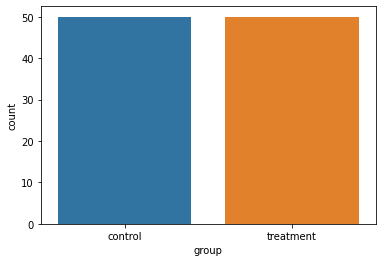

In [ ]:
sns.countplot(data=df,x='group');

OBSERVATION:

1. There are 2 groups-control group & treatment group.
2. There are 50 users in each group.

**Observation on Landing Page**

In [ ]:
df.landing_page.value_counts()

old    50
new    50
Name: landing_page, dtype: int64

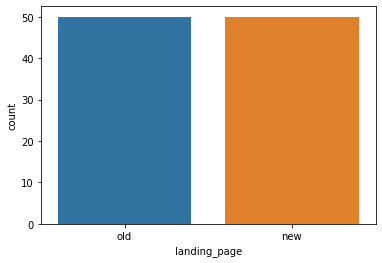

In [ ]:
sns.countplot(data=df,x='landing_page');

OBSERVATION:

1. As the control group was assigned to the old landing page & the treatment group was assigned to the new landing page, the count for each of the landing page is similar to the allocation to the group.
2. There are 50 users for the old landing page & 50 for the new landing page.

**Observation on Time Spent on Page**

In [ ]:
df.time_spent_on_the_page.max()

10.71

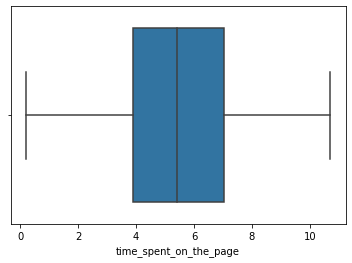

In [ ]:
sns.boxplot(data=df,x='time_spent_on_the_page');

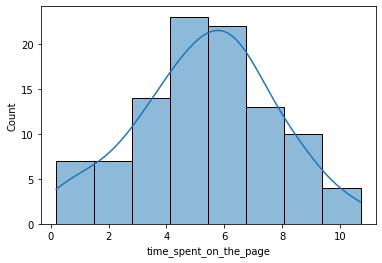

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page',kde=True);

OBSERVATION:

1. The distribution is normal & there is no skewness in the data.
2. There are no outliers present in the data.
3. Almost 50% of the users spend less than 5.4 minutes on a landing page while 75% of the users spend less than almost 7 minutes on a landing page.
4. The maximum time that a user has spent on a landing page is almost 11 minutes.



**Observation on Converted**

In [ ]:
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

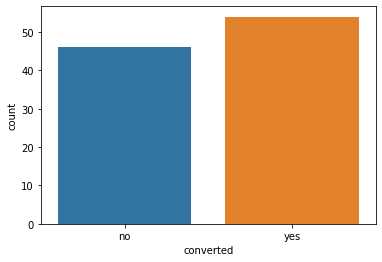

In [ ]:
sns.countplot(data=df,x='converted');

OBSERVATION:

Of the 100 users in the experiments, 54 users have decided to subscribe to the news portal while 46 users have decided not to.

**Observation on Language Preferred**

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

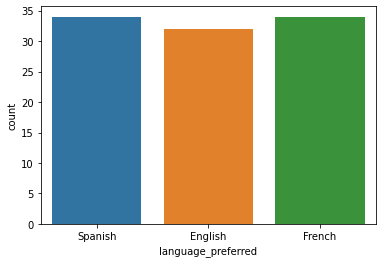

In [ ]:
sns.countplot(data=df,x='language_preferred');

OBSERVATION:

1. Amongst the 100 users, there is more preference for Spanish & French that English Language.
2. The users prefernce for Spanish & French is equal with the count being 34 each while marginaly lower for English by 2 users.

# **Bivariate Analysis**

**Relation between Group & Time spent on the page**

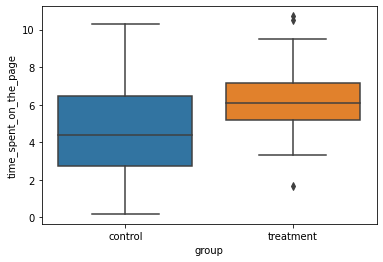

In [ ]:
sns.boxplot(data=df,y='time_spent_on_the_page',x='group');

OBSERVATION:

1. It can be seen that, the treatment group tends to spend more time on a landing page in comparison to the control group.
2. 50% of the users in control group spend almost 4.3 minutes on the old landing page while 50% of the users in the treatment group spend almost 6 minutes on the new landing page.
3. There are outliers present for the treatment group with one user spending lesser time of 2 minutes than the minimum  while 2 users spending more time than the maximum.


**Relation between Group and Converted**

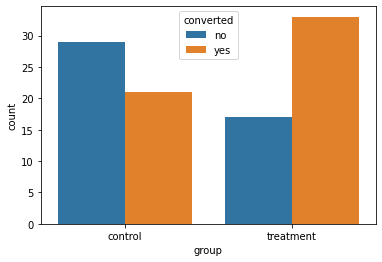

In [ ]:
sns.countplot(data=df,x='group',hue='converted');

OBSERVATION:
1. It can be seen that more users from the treatment group have subscribed to the news portal than the control group.
2. Of the 50 users in the treatment group,almost 33 have subscribed to the news portal while around 17 have decided not to.
3. Of the 50 users in the control group, only around 21 have subscribed to the news portal while almost 29 have decided not to.

**Relation between Group & Language Preferred**

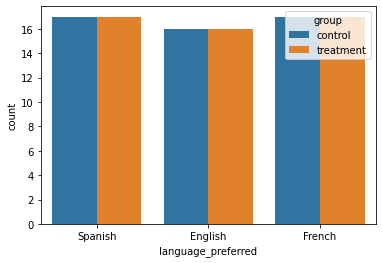

In [ ]:
sns.countplot(data=df,hue='group',x='language_preferred');

OBSERVATION:

1. There is equal distribution of users in the control group & treatment group for each of the 3 prefered language,viz,English, Spanish & French.
2. For Spanish & French, there are 17 users in each group.
3. For English, there are 16 users in each group.

**Relation between Conversion & Time spent on page**

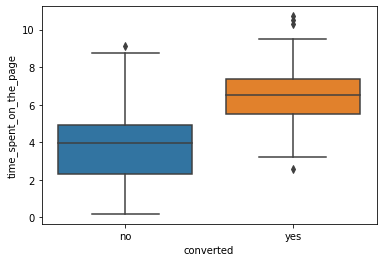

In [ ]:
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page');

OBSERVATION:

1. It can be seen that, the users who converted to subscription to the news portal, spent more time on the landing page.
2. 50% of the users who did not subscribe to the news portal, spent only 4 minutes on the landing page while 50% of the users who subscribed to the news portal,spent close to 7 minutes on the landing page.
3. There are outliers present for both the set.
4. Only 1 user spent more than the maximum time & still chose not to subscribe to the newsportal.
5. Around 3 users spent more than the maximum time & chose to subscribe & 1 user spent less than the minimum time on the landing page & still chose to subscribe to the news portal.

**Relation between Language Preferred & Time spent on the page**

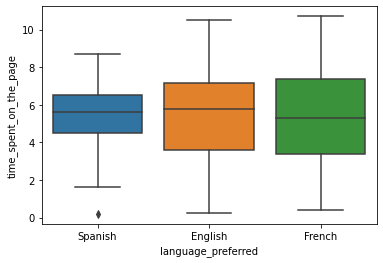

In [ ]:
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page');

OBSERVATION:

1. The users who preferred Spanish, had the least range of spending time on a landing page in comparison to the other language users.
2. Almost 50% of users in all languages,spent less than 6 miuntes on a landing page.
3. There is only 1 outlier for the Spanish language, where the user spent hardly 1 minute on the landing page which is less than the minimum.

**Relation between Language Preferred & Converted**

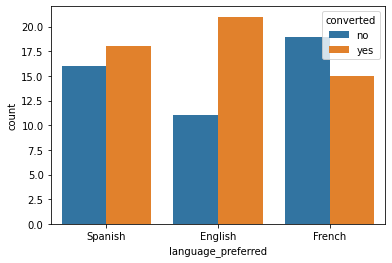

In [ ]:
sns.countplot(data=df,x='language_preferred',hue='converted');

OBSERVATION:

1. The conversion to subscription of the news portal is maximum for English language & least for the French Language.
2. Of the 32 English users, almost 21 have subscibed to the news portal.
3. Of the 34 Spanish users, only 18 have subscribed to the news portal.
4. Of the 34 French users, only 15 have subscribed to the news portal.

# 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

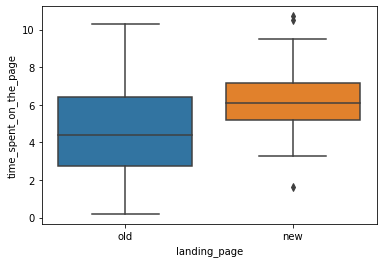

In [ ]:
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page');

In [ ]:
df.groupby('landing_page').mean()[['time_spent_on_the_page']]

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean time spent on new landing page is less than or equal to mean time spent on existing land page. <br>

> $H_a:$ The mean time spent on new landing page is greater than the mean time spent on existing landing page.

Let $\mu1$ be the mean time spent on new landing page and $\mu2$ be the mean time spent on the existing landing page.

Mathematically, the above formulated hypotheses can be written as:

>$H_0: \mu1 \le \mu2  $ <br>
$H_a: \mu1 > \mu2 $

### Step 2: Select Appropriate test

This is a case of a one-tailed test of 2 independent population means. Since the population standard deviation is unknown, a **2-sample t-test** will be appropriate to test the formulated hypotheses.

### Step 3: Decide the significance level

The significance level is 0.05

### Step 4: Collect and prepare data

In [ ]:
#extracting and storing the data of the new landing page
df_new_landing_page=df.loc[df['landing_page']=='new']
df_new_landing_page.head(5)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [ ]:
#extracting and storing the data of the old landing page.
df_old_landing_page=df.loc[df['landing_page']=='old']
df_old_landing_page.head(5)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


In [ ]:
print('The mean time spent on the new landing page is:',df_new_landing_page.time_spent_on_the_page.mean())
print('The mean time spent on the old landing page is:',df_old_landing_page.time_spent_on_the_page.mean())
print('The standard deviation of the new landing page is:',df_new_landing_page.time_spent_on_the_page.std())
print('The standard deviation of the old landing page is:',df_old_landing_page.time_spent_on_the_page.std())

The mean time spent on the new landing page is: 6.2232
The mean time spent on the old landing page is: 4.532400000000001
The standard deviation of the new landing page is: 1.8170310387878263
The standard deviation of the old landing page is: 2.581974849306046


As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_new_landing_page['time_spent_on_the_page'],df_old_landing_page['time_spent_on_the_page'] , equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value > 0.05:
  print('p-value',p_value,'is greater than the level of significance & hence cannot reject the null hypothesis')
else:
   print('p-value',p_value,'is lesser than the level of significance & hence can reject the null hypothesis')

p-value 0.0001392381225166549 is lesser than the level of significance & hence can reject the null hypothesis


### Step 7:  Draw inference

As the p-value (~0.00014) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spend more time on the new landing page than the existing landing page.


**A similar approach can be followed to answer the other questions.**

# 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

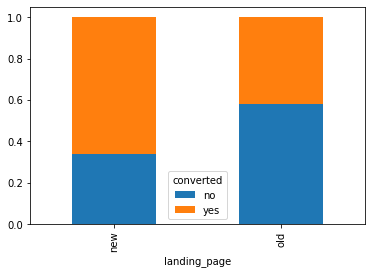

In [ ]:
pd.crosstab(df.landing_page,df.converted,normalize='index').plot(kind='bar',stacked=True);

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The conversion rate on new landing page is less than or equal to conversion rate on old landing page. <br>

> $H_a:$ The conversion rate on new landing page is greater than the conversion rate on old landing page.

Let $p1$ be the proprtion of conversion on new landing page and $p2$ be the proportion of conversion on the existing landing page.

Mathematically, the above formulated hypotheses can be written as:

>$H_0: p1 \le p2  $ <br>
$H_a: p1 > p2 $

 ###  Step 2: Select appropriate test

This is a one tailed test being performed on 2 population proporations on 2 independent population. We will be performing the 2 proportion Z-test.

### Step 3: Set the level of significance

The level of significance is set to 0.05.

### Step 4: Prepare & Collect the data

In [ ]:
pd.crosstab(df.landing_page,df.converted,margins=True)

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


In [ ]:
#set the count of users converted from new & old landing page respectively
converted_count=np.array([33,21])
#set the count of sample size
size=np.array([50,50])

### Step 5: Compute p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest(converted_count, size,alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare p-value with level of significance

In [ ]:
if p_value < 0.05:
   print('p-value',p_value,'is less than the level of significance & null hypothesis is rejected')
else:
   print('p-value',p_value,'is greater than the level of significance & null hypothesis cannot be rejected')

p-value 0.008026308204056278 is less than the level of significance & null hypothesis is rejected


### Inference:

As the p-value(~0.008) is less than the level of significance of 5%, the null hypothesis is rejected. This implies the converison rate on new landing page is greater than that on old landing page.

# 3. Is the conversion and preferred language are independent or related?

### Prepare Visual  Analysis

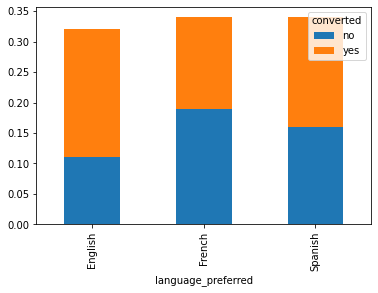

In [ ]:
pd.crosstab(df['language_preferred'],df['converted'],normalize=True).plot(kind='bar',stacked=True);

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The conversion is independent of the preferred language. <br>

> $H_a:$ The conversion is dependent on the preferred language.



### Step 2: Select appropriate Test

As we are testing for independence & on 2 categorical variables, we will be performing the Chi-Square Test for independence

### Step 3: Set the level of significance

Let the level of significance (alpha) be set at 0.05.

### Step 4: Prepare & Collect data

In [ ]:
contigency_table=pd.crosstab(df.language_preferred,df.converted)
contigency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Compute p-value

In [ ]:
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contigency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare p-value with level of significance

In [ ]:
if p_value < 0.05:
   print('As the p-value',p_value,'is less than the level of significance,the null hypothesis is rejected.')
else:
   print('As the p-value',p_value,'is greater than the level of significance,the null hypothesis cannot be rejected.')

As the p-value 0.2129888748754345 is greater than the level of significance,the null hypothesis cannot be rejected.


### Step 7: Inference

As the p-value(~0.213) is greater than the 5% significance level, the null hypothesis cannot be rejected. This implies the conversion is indepenent of the preferred language.

# 4. Is the time spent on the new page same for the different language users?

### Prepare Visual Analysis

In [ ]:
new_page_summary=df.loc[df['landing_page']=='new']
new_page_summary.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


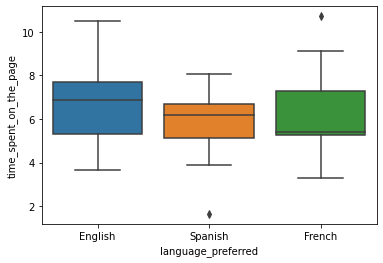

In [ ]:
sns.boxplot(data=new_page_summary,x=new_page_summary.language_preferred,y=new_page_summary.time_spent_on_the_page);

### Step 1: Define Null & Alternate Hypothesis

The null and alternative hypotheses can be formulated as:

> $H_0$ : The mean time spent on the new landing page for all languages is equal. <br>
> $H_a$ : At least one of the mean time spent on the new landing page with respect to the three languages is different.

### Step 2: Select appropriate test

Since there are 3 population means concerned, we will performing the one was ANOVA test provided normality & equality of variance assumptions are verified.

Let's test the normality by using **Shapiro-Wilks** Test



**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on new landing page follows a normal distribution

against the alternative hypothesis

>$H_a:$ The time spend on new landing page does not follow a normal distribution

In [ ]:
# find the p-value
w, p_value = stats.shapiro(new_page_summary['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis .This implies the time spent on the new landing page follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
# find the p-value
statistic, p_value = stats.levene(new_page_summary[new_page_summary['language_preferred']=='English']['time_spent_on_the_page'],
                            new_page_summary[new_page_summary['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            new_page_summary[new_page_summary['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis.It implies all population variances are equal.

## Step 3: Set the significance level

Let the level of significance be set at 0.05

## Step 4: Collect & Prepare the Data

In [ ]:
time_spent_on_page_English=new_page_summary[new_page_summary['language_preferred']=='English']['time_spent_on_the_page']
time_spent_on_page_Spanish=new_page_summary[new_page_summary['language_preferred']=='Spanish']['time_spent_on_the_page']
time_spent_on_page_French=new_page_summary[new_page_summary['language_preferred']=='French']['time_spent_on_the_page']

## Step 5: Compute p-value

In [ ]:
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(time_spent_on_page_English, time_spent_on_page_French,time_spent_on_page_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


## Step 6: Compare p-value with level of significance

In [ ]:
if p_value < 0.05:
   print('As the p-value',p_value,'is less than the level of significance,the null hypothesis is rejected.')
else:
   print('As the p-value',p_value,'is greater than the level of significance,the null hypothesis cannot be rejected.')

As the p-value 0.43204138694325955 is greater than the level of significance,the null hypothesis cannot be rejected.


## Inference:

As the p-value(~0.432) is greater than the 5% significance level, the null hypothesis cannot be rejected. This implies the mean time spent on the new landing page is the same irrespective of the language.

# Conclusion and Business Recommendations

CONCLUSIONS:

1. From the data set, it is seen that the median(5.42 minutes) and mean(5.4 minutes) time that user spends on a landing page is almost the same.
2. Of the 100 users, 54 have subscrbied to the news portal while 46 have decided not to . Of the 54 who had subscribed 33 were from the treatment group & only 21 from the control group.
3. The users who spent more time on a landing page,tend to subscribe to the news portal.
4.By performing the 2 sample t-test, we were able to conclude that users spent more time on the new landing page than on the existing landing page.
5.By performing the 2 proportion z test, we were able to conclude that the conversion rate on the new landing page is greater than that on the existing landing page.
6.By performing the Chi Square Test of independence, we can see that the conversion of a user to subscription has no dependence on the language preferred by the user.
7.By performing the ANOVA test,we see that on the new landing page, the user spends equal time irrespective of the language.


BUSINESS RECOMMENDATIONS:

1. The news portal should go live with the new landing page having new outline & content recommendation to expand their business.
2. The news portal can also increase the language options to attract other language customers such as Chinese, German, Russian, etc. & thus increase the subscription to the news portal.
3. The E-news Express portal can also provide offers or yearly subscription discounts to attract more  customers.
4. Feedback can be obtained from those who chose to not subscribe to understand the requirement & look at the possibility of implementing to increase customer base.

___